In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d62a987b809f5710f0dfb5d892718013


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | vila franca do campo
Processing Record 4 of Set 1 | mamlyutka
Processing Record 5 of Set 1 | yalchiki
City not found. Skipping...
Processing Record 6 of Set 1 | burla
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | huilong
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | patterson
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | coahuayana
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | wajid
Processing Record 20 of Set 1 | amderma
City not found. Skipping...
Processing Record

Processing Record 39 of Set 4 | pacific grove
Processing Record 40 of Set 4 | cape town
Processing Record 41 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 4 | longyearbyen
Processing Record 43 of Set 4 | sinnamary
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | kibakwe
Processing Record 46 of Set 4 | bondo
Processing Record 47 of Set 4 | sabang
Processing Record 48 of Set 4 | port-cartier
Processing Record 49 of Set 4 | haukipudas
Processing Record 50 of Set 4 | arlit
Processing Record 1 of Set 5 | margate
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | bowen
Processing Record 4 of Set 5 | hobart
Processing Record 5 of Set 5 | roald
Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | freeport
Processing Record 9 of Set 5 | roseburg
Processing Record 10 of Set 5 | ponta do sol
Processing Record 11 of Set 5 | yairipok
Processing Record 12 of Set

Processing Record 30 of Set 8 | gornopravdinsk
Processing Record 31 of Set 8 | kaele
Processing Record 32 of Set 8 | mildura
Processing Record 33 of Set 8 | tabou
Processing Record 34 of Set 8 | coquimbo
Processing Record 35 of Set 8 | obluche
City not found. Skipping...
Processing Record 36 of Set 8 | cacequi
Processing Record 37 of Set 8 | monrovia
Processing Record 38 of Set 8 | altay
Processing Record 39 of Set 8 | haapiti
Processing Record 40 of Set 8 | kirakira
Processing Record 41 of Set 8 | muriti
Processing Record 42 of Set 8 | saint-joseph
Processing Record 43 of Set 8 | sataua
City not found. Skipping...
Processing Record 44 of Set 8 | idenao
Processing Record 45 of Set 8 | kaeo
Processing Record 46 of Set 8 | sibu
Processing Record 47 of Set 8 | pasni
Processing Record 48 of Set 8 | palana
Processing Record 49 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 8 | nha trang
Processing Record 1 of Set 9 | cabo san lucas
Processing Record 2 of Set 9 |

Processing Record 22 of Set 12 | kulgam
Processing Record 23 of Set 12 | praia
Processing Record 24 of Set 12 | tres arroyos
Processing Record 25 of Set 12 | barcelona
Processing Record 26 of Set 12 | maragogi
Processing Record 27 of Set 12 | houma
Processing Record 28 of Set 12 | pochutla
Processing Record 29 of Set 12 | whitehorse
Processing Record 30 of Set 12 | assiniboia
Processing Record 31 of Set 12 | yenagoa
Processing Record 32 of Set 12 | spring valley
Processing Record 33 of Set 12 | doka
Processing Record 34 of Set 12 | rupert
Processing Record 35 of Set 12 | gollere
City not found. Skipping...
Processing Record 36 of Set 12 | djibo
Processing Record 37 of Set 12 | saint-augustin
Processing Record 38 of Set 12 | casper
Processing Record 39 of Set 12 | sayyan
Processing Record 40 of Set 12 | waipawa
Processing Record 41 of Set 12 | deh rawud
City not found. Skipping...
Processing Record 42 of Set 12 | xiaoweizhai
Processing Record 43 of Set 12 | miles city
Processing Record 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,63.41,59,0,7.81,MX,2021-01-22 01:00:34
1,Mount Gambier,-37.8333,140.7667,69.80,56,100,11.50,AU,2021-01-22 01:00:39
2,Vila Franca Do Campo,37.7167,-25.4333,55.99,82,20,3.44,PT,2021-01-22 01:00:39
3,Mamlyutka,54.9375,68.5394,-15.07,89,75,8.81,KZ,2021-01-22 01:00:39
4,Burla,21.5000,83.8667,55.11,42,0,3.80,IN,2021-01-22 01:00:39
5,Upernavik,72.7868,-56.1549,26.08,98,100,11.03,GL,2021-01-22 01:00:39
6,Severo-Kurilsk,50.6789,156.1250,21.13,91,63,3.36,RU,2021-01-22 01:00:40
7,Huilong,31.8111,121.6550,53.01,94,94,1.99,CN,2021-01-22 01:00:40
8,Sao Filipe,14.8961,-24.4956,72.57,71,100,7.43,CV,2021-01-22 01:00:40
9,Tiksi,71.6872,128.8694,-32.30,83,100,18.79,RU,2021-01-22 01:00:40


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guerrero Negro,MX,2021-01-22 01:00:34,27.9769,-114.0611,63.41,59,0,7.81
1,Mount Gambier,AU,2021-01-22 01:00:39,-37.8333,140.7667,69.80,56,100,11.50
2,Vila Franca Do Campo,PT,2021-01-22 01:00:39,37.7167,-25.4333,55.99,82,20,3.44
3,Mamlyutka,KZ,2021-01-22 01:00:39,54.9375,68.5394,-15.07,89,75,8.81
4,Burla,IN,2021-01-22 01:00:39,21.5000,83.8667,55.11,42,0,3.80
5,Upernavik,GL,2021-01-22 01:00:39,72.7868,-56.1549,26.08,98,100,11.03
6,Severo-Kurilsk,RU,2021-01-22 01:00:40,50.6789,156.1250,21.13,91,63,3.36
7,Huilong,CN,2021-01-22 01:00:40,31.8111,121.6550,53.01,94,94,1.99
8,Sao Filipe,CV,2021-01-22 01:00:40,14.8961,-24.4956,72.57,71,100,7.43
9,Tiksi,RU,2021-01-22 01:00:40,71.6872,128.8694,-32.30,83,100,18.79


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

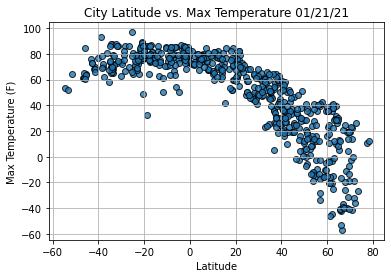

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

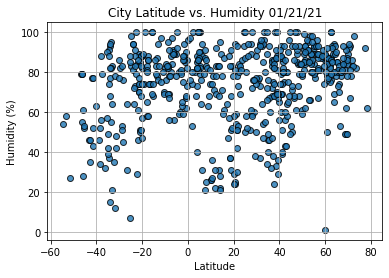

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

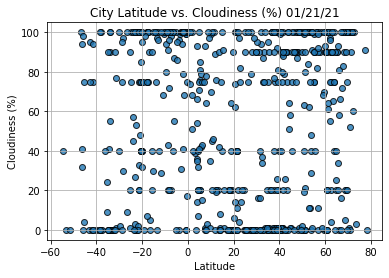

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

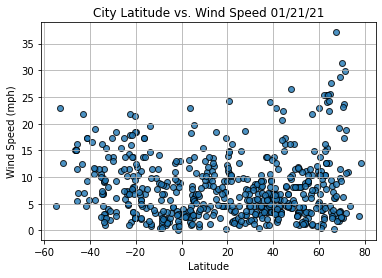

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-01-22 01:00:40
Lat                        -33.65
Lng                       115.333
Max Temp                       79
Humidity                       55
Cloudiness                      0
Wind Speed                      3
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
580     True
581    False
582     True
583     True
584    False
Name: Lat, Length: 585, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guerrero Negro,MX,2021-01-22 01:00:34,27.9769,-114.0611,63.41,59,0,7.81
2,Vila Franca Do Campo,PT,2021-01-22 01:00:39,37.7167,-25.4333,55.99,82,20,3.44
3,Mamlyutka,KZ,2021-01-22 01:00:39,54.9375,68.5394,-15.07,89,75,8.81
4,Burla,IN,2021-01-22 01:00:39,21.5000,83.8667,55.11,42,0,3.80
5,Upernavik,GL,2021-01-22 01:00:39,72.7868,-56.1549,26.08,98,100,11.03
...,...,...,...,...,...,...,...,...,...
577,Kavaratti,IN,2021-01-22 01:02:04,10.5669,72.6420,81.46,74,20,10.22
578,Fasano,IT,2021-01-22 01:02:04,40.8344,17.3584,52.00,88,100,3.00
580,Chifeng,CN,2021-01-22 01:02:04,42.2683,118.9636,9.88,86,0,2.13
582,Marawi,PH,2021-01-22 01:02:04,7.9986,124.2928,81.00,86,78,4.00


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guerrero Negro,MX,2021-01-22 01:00:34,27.9769,-114.0611,63.41,59,0,7.81
2,Vila Franca Do Campo,PT,2021-01-22 01:00:39,37.7167,-25.4333,55.99,82,20,3.44
3,Mamlyutka,KZ,2021-01-22 01:00:39,54.9375,68.5394,-15.07,89,75,8.81
4,Burla,IN,2021-01-22 01:00:39,21.5000,83.8667,55.11,42,0,3.80
5,Upernavik,GL,2021-01-22 01:00:39,72.7868,-56.1549,26.08,98,100,11.03


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

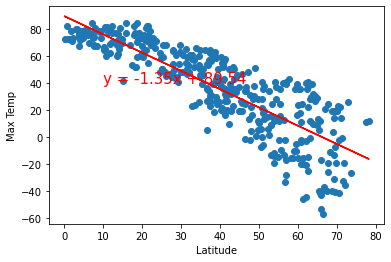

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

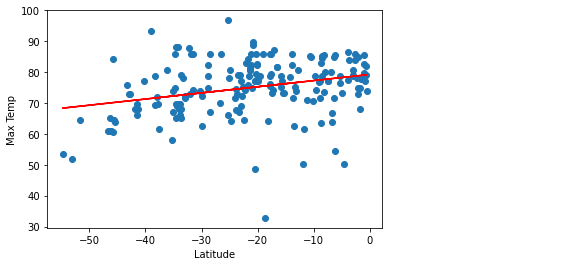

In [25]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

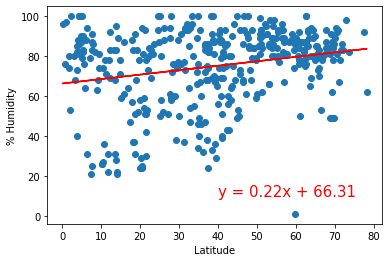

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

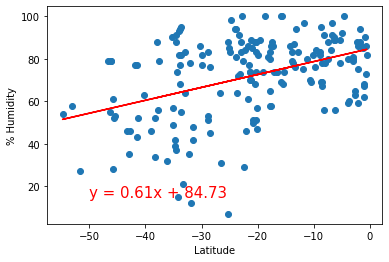

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

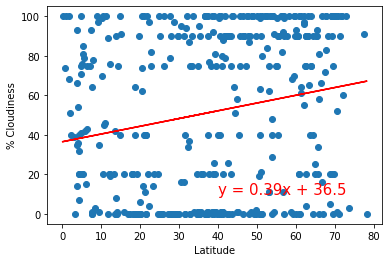

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Cloudiness', '% Cloudiness',(40,10))

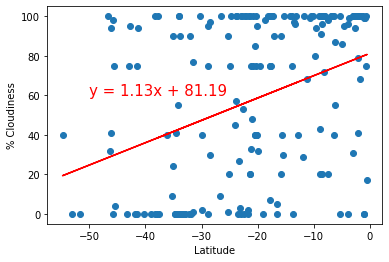

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

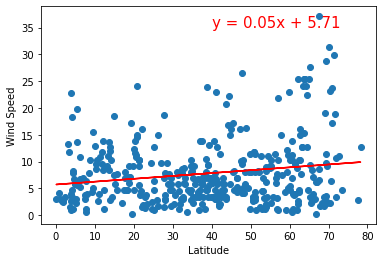

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

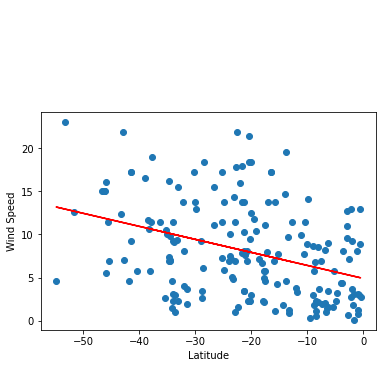

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))